### 간호사 월급 예측

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib
from sklearn.preprocessing import StandardScaler
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

In [4]:
df = pd.read_csv('./data/watson_healthcare_modified.csv')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [6]:
print(df.describe())

         EmployeeID          Age    DailyRate  DistanceFromHome    Education  \
count  1.676000e+03  1676.000000  1676.000000       1676.000000  1676.000000   
mean   1.456796e+06    36.866348   800.557876          9.221957     2.907518   
std    2.487486e+05     9.129126   401.594438          8.158118     1.025835   
min    1.025177e+06    18.000000   102.000000          1.000000     1.000000   
25%    1.235832e+06    30.000000   465.000000          2.000000     2.000000   
50%    1.464606e+06    36.000000   796.500000          7.000000     3.000000   
75%    1.667992e+06    43.000000  1157.000000         14.000000     4.000000   
max    1.886378e+06    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1676.0              1676.000000  1676.000000     1676.000000   
mean             1.0                 2.714797    65.470167        2.724940   
std              0.0                 1.097534

In [7]:
df.isnull().sum() # 결측치 없음

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [42]:
selected_features = ['Age', 'Education', 'JobLevel', 'JobRole', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating', 'OverTime']

In [43]:
import pandas as pd

df = pd.read_csv('./data/watson_healthcare_modified.csv')

# 선택한 컬럼 리스트
selected_features = ['Age', 'Education', 'JobLevel', 'JobRole', 
                     'TotalWorkingYears', 'YearsAtCompany', 
                     'YearsInCurrentRole', 'PerformanceRating', 'OverTime']

# 선택한 칼럼들만 포함한 데이터프레임 생성
df_selected = df[selected_features]

# 데이터 확인 (VSCode에서는 df.head() 추천)
print(df_selected.head())

# CSV로 저장하고 VSCode에서 직접 열어볼 수도 있음
df_selected.to_csv("selected_features_data.csv", index=False)

   Age  Education  JobLevel JobRole  TotalWorkingYears  YearsAtCompany  \
0   41          2         2   Nurse                  8               6   
1   49          1         2   Other                 10              10   
2   37          2         1   Nurse                  7               0   
3   33          4         1   Other                  8               8   
4   27          1         1   Nurse                  6               2   

   YearsInCurrentRole  PerformanceRating OverTime  
0                   4                  3      Yes  
1                   7                  4       No  
2                   0                  3      Yes  
3                   7                  3      Yes  
4                   2                  3       No  


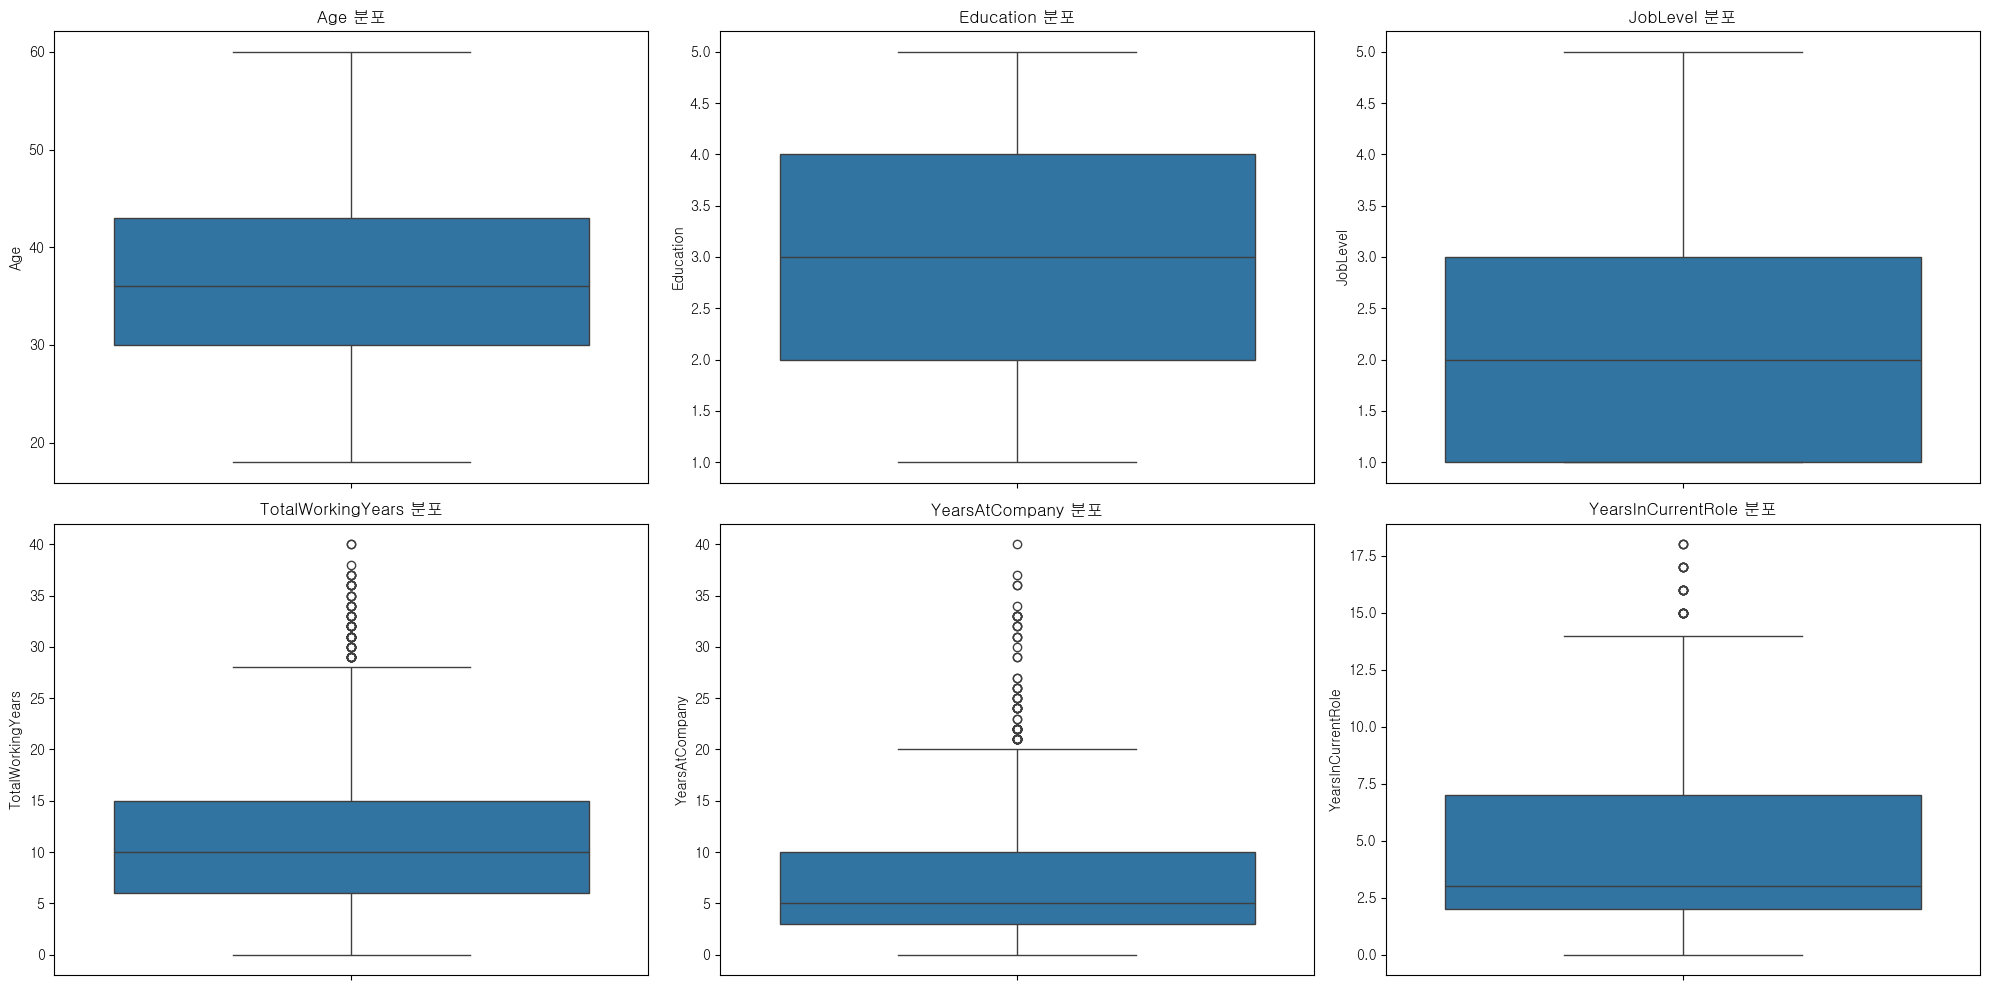

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = [feature for feature in selected_features if feature not in ["OverTime", "JobRole", "PerformanceRating", "MonthlyIncome"]]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10)) 
axes = axes.flatten() 

for i, feature in enumerate(features_to_plot):
    if feature in df.columns:
        sns.boxplot(y=df[feature], ax=axes[i])
        axes[i].set_title(f'{feature} 분포')

plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_19808\2757993300.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Education", y="MonthlyIncome", data=df_selected, ci=None, ax=axes[1, 0])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19808\2757993300.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="JobRole", y="MonthlyIncome", data=df_selected, ci=None, ax=axes[1, 2])


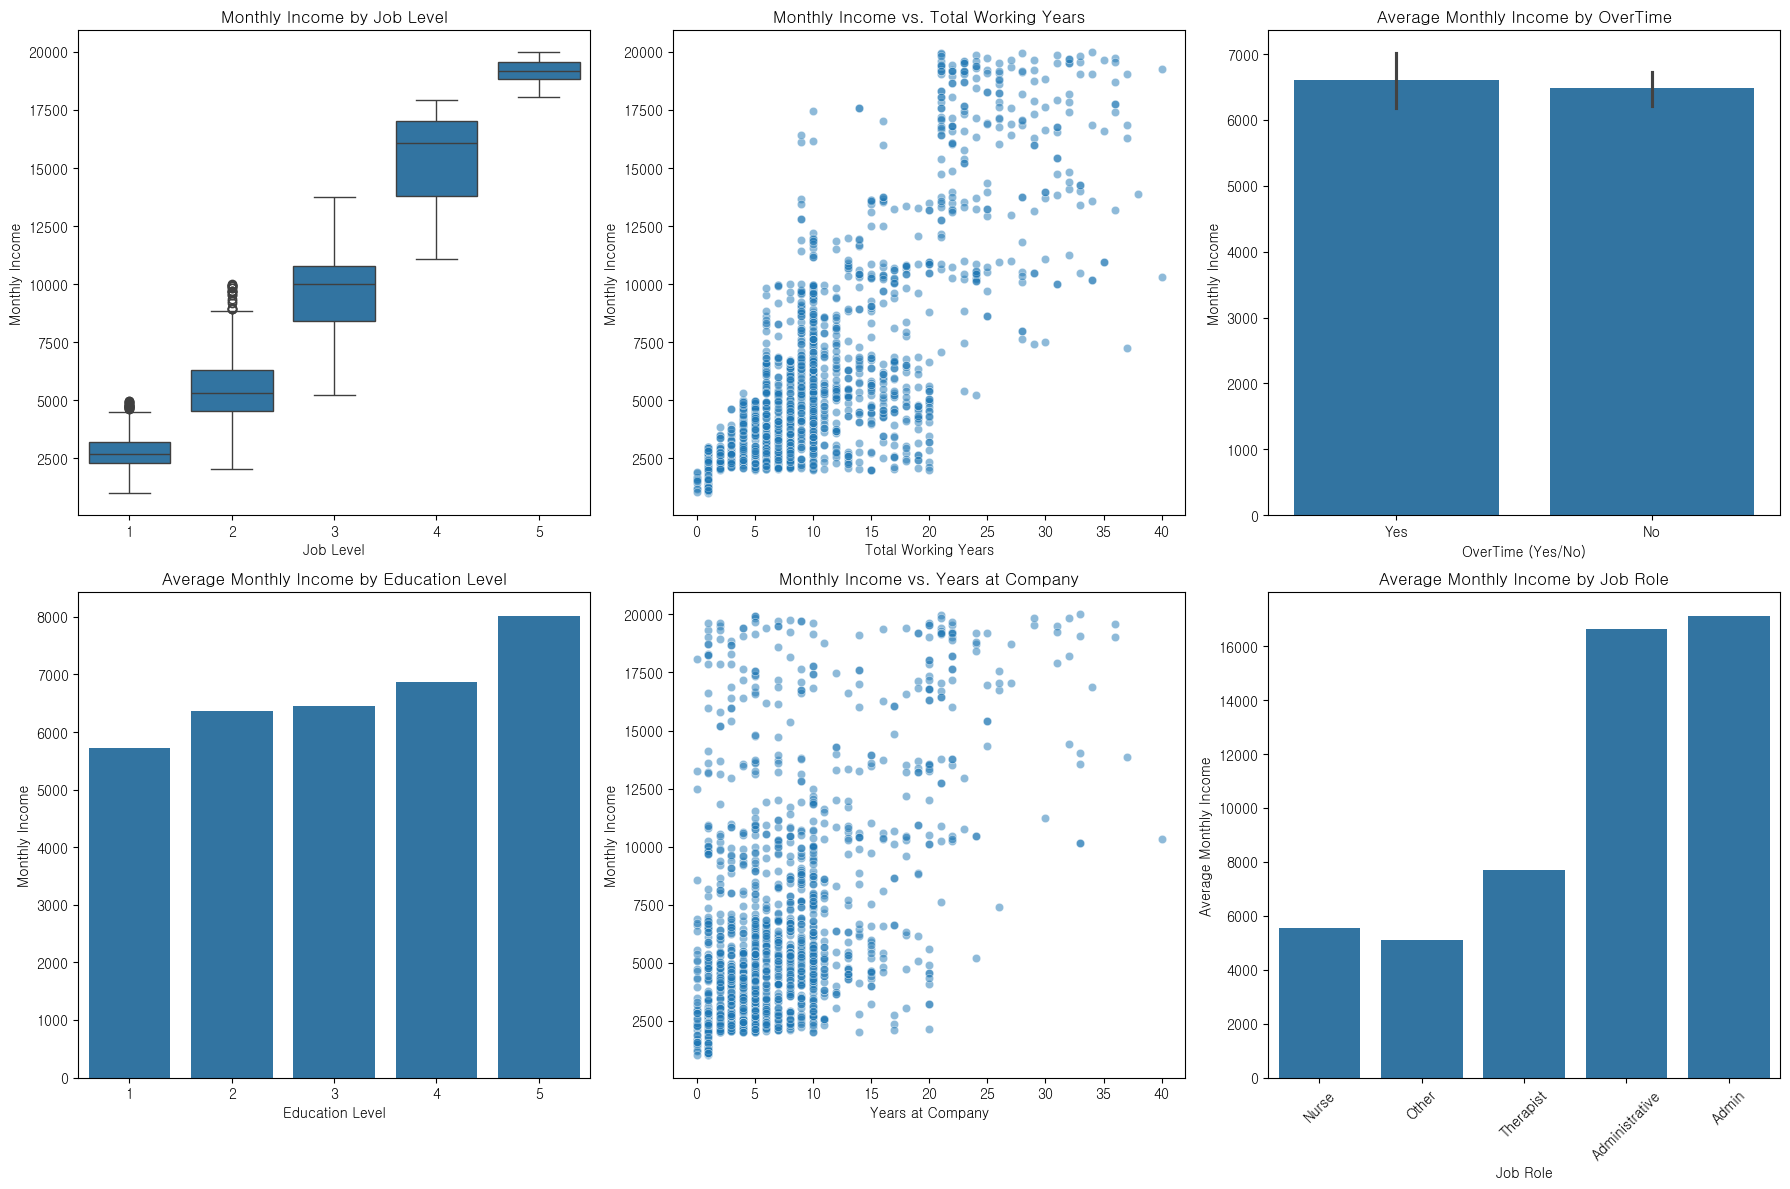

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_selected = df[selected_features + ["MonthlyIncome"]]

df_selected = df_selected.dropna()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#직급(JobLevel) vs. 월급
sns.boxplot(x="JobLevel", y="MonthlyIncome", data=df_selected, ax=axes[0, 0])
axes[0, 0].set_title("Monthly Income by Job Level")
axes[0, 0].set_xlabel("Job Level")
axes[0, 0].set_ylabel("Monthly Income")

# 총 근무 연수(TotalWorkingYears) vs. 월급
sns.scatterplot(x="TotalWorkingYears", y="MonthlyIncome", data=df_selected, alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Monthly Income vs. Total Working Years")
axes[0, 1].set_xlabel("Total Working Years")
axes[0, 1].set_ylabel("Monthly Income")

# 초과 근무(OverTime) 여부에 따른 월급 차이
sns.barplot(x="OverTime", y="MonthlyIncome", data=df_selected, ax=axes[0, 2])
axes[0, 2].set_title("Average Monthly Income by OverTime")
axes[0, 2].set_xlabel("OverTime (Yes/No)")
axes[0, 2].set_ylabel("Monthly Income")

# 교육 수준(Education) vs. 월급
sns.barplot(x="Education", y="MonthlyIncome", data=df_selected, ci=None, ax=axes[1, 0])
axes[1, 0].set_title("Average Monthly Income by Education Level")
axes[1, 0].set_xlabel("Education Level")
axes[1, 0].set_ylabel("Monthly Income")

# 회사 근속 연수(YearsAtCompany) vs. 월급 (산점도)
sns.scatterplot(x="YearsAtCompany", y="MonthlyIncome", data=df_selected, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Monthly Income vs. Years at Company")
axes[1, 1].set_xlabel("Years at Company")
axes[1, 1].set_ylabel("Monthly Income")

# 직무 역할(JobRole) vs. 평균 월급 (바 플롯) → 마지막 시각화 변경됨
sns.barplot(x="JobRole", y="MonthlyIncome", data=df_selected, ci=None, ax=axes[1, 2])
axes[1, 2].set_title("Average Monthly Income by Job Role")
axes[1, 2].set_xlabel("Job Role")
axes[1, 2].set_ylabel("Average Monthly Income")
axes[1, 2].tick_params(axis='x', rotation=45)  # x축 라벨 가독성 향상을 위해 45도 회전

# 레이아웃 조정
plt.tight_layout()
plt.show()


1. 직급(JobLevel)이 높을수록 월급이 증가하는 경향이 뚜렷함. 하지만 같은 직급 내에서도 월급 차이가 큼 → 추가적인 요소가 영향을 줄 가능성 있음.
2. 경력이 많을수록 월급이 증가하는 패턴을 보임.
하지만 20년 이상 근무한 직원 중에서도 낮은 월급을 받는 경우가 있음.
→ 직급(JobLevel)과 학력(Education) 같은 다른 요소도 중요할 가능성.
3. 초과 근무를 하는 직원(Yes)이 평균적으로 약간 높은 월급을 받음.
하지만 차이가 크지 않음 → 초과 근무 자체가 월급을 결정하는 주요 요인은 아닐 가능성.
4. 학위(Education Level)가 높을수록 평균 월급이 증가하는 경향이 있음.
5. 일반적으로 회사를 오래 다닐수록 월급이 증가하는 경향이 있음. 하지만 10년 이상 근속한 직원 중에서도 낮은 월급을 받는 경우가 있음.
→ 직급(JobLevel)과 경력(TotalWorkingYears)이 더 중요한 요소일 가능성.
6. 직무(JobRole)에 따라 월급 차이가 확연히 존재함. "Administrative", "Admin" 등의 직무는 평균적으로 높은 월급을 받으며, Nurse, Other, Therapist 직무는 상대적으로 낮음.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df_selected = df[selected_features + ["MonthlyIncome"]].drop(columns=['YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating', 'OverTime'])

# 범주형 데이터 인코딩 (One-Hot Encoding)
df_selected = pd.get_dummies(df_selected, columns=["JobRole"], drop_first=True)

scaler = StandardScaler()
numeric_features = ["Age"]
df_selected[numeric_features] = scaler.fit_transform(df_selected[numeric_features])

X = df_selected.drop(columns=["MonthlyIncome"])
y = df_selected["MonthlyIncome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 연속형 변수 스케일링 (표준화) - "Age"만 스케일링
scaler = StandardScaler()
X_train[["Age"]] = scaler.fit_transform(X_train[["Age"]])
X_test[["Age"]] = scaler.transform(X_test[["Age"]])


In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),  # 최적화: 트리 개수 줄이기
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=30, random_state=42)  # 최적화: 트리 개수 줄이기
}

# 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 평가 지표 계산
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df




,MAE,MSE,RMSE,R²
Linear Regression,986.519309,1.739649e+06,1318.957714,0.926641
Random Forest,819.672734,1.325873e+06,1151.465572,0.944089
KNN,947.134524,1.623093e+06,1274.006665,0.931556
XGBoost,844.173645,1.326938e+06,1151.927732,0.944044
